In [0]:
from __future__ import print_function
!pip install numpy==1.16.1
import numpy as np
import nltk

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import SimpleRNN
from keras.datasets import imdb

import matplotlib.pyplot as plt

nltk.download('punkt')

     |████████████████████████████████| 17.3MB 41.5MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


Using TensorFlow backend.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')



Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences


Pad sequences (samples x time)


W0819 15:44:13.108060 140103403894656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0819 15:44:13.141767 140103403894656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0819 15:44:13.147655 140103403894656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0819 15:44:13.289703 140103403894656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 180)               55620     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 181       
Total params: 2,615,801
Trainable params: 2,615,801
Non-trainable params: 0
_________________________________________________________________
None


W0819 15:44:13.315684 140103403894656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0819 15:44:13.321998 140103403894656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train...


W0819 15:44:13.652044 140103403894656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 38s 2ms/step - loss: 0.6764 - acc: 0.5610 - val_loss: 0.6283 - val_acc: 0.6577
Epoch 2/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.5161 - acc: 0.7532 - val_loss: 0.6719 - val_acc: 0.5625
Epoch 3/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.4506 - acc: 0.7956 - val_loss: 0.5072 - val_acc: 0.7600
Epoch 4/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4055 - acc: 0.8228 - val_loss: 0.5075 - val_acc: 0.7825
Epoch 5/15
25000/25000 [==============================] - 34s 1ms/step - loss: 0.3675 - acc: 0.8465 - val_loss: 0.5444 - val_acc: 0.7678
Epoch 6/15
25000/25000 [==============================] - 34s 1ms/step - loss: 0.3606 - acc: 0.8527 - val_loss: 0.5490 - val_acc: 0.7366
Epoch 7/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.2820 - acc: 0.8934 - val_loss: 0.5397 - val_acc

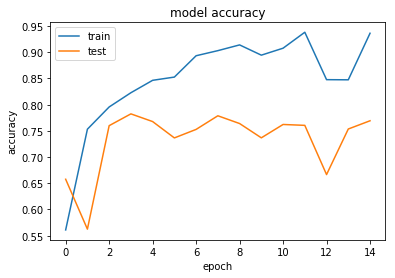

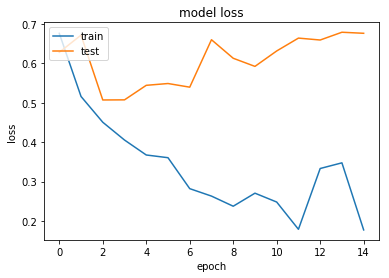

In [0]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(180, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15, 
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from nltk import word_tokenize
from keras.preprocessing import sequence
word2index = imdb.get_word_index()
test=[]
for word in word_tokenize( "good movie"):
     test.append(word2index[word])

test=sequence.pad_sequences([test],maxlen=100)
model.predict(test)

1646592/1641221 [==============================] - 1s 1us/step


array([[0.09491771]], dtype=float32)